In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

from tqdm.notebook import trange
#from TaPR_pkg import etapr
from pathlib import Path
import time

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100


In [22]:
import os
abspath = os.path.abspath("D:/dacon/HAI/HAICon2020_dataset/train/")
abspath2 = os.path.abspath("D:/dacon/HAI/HAICon2020_dataset/validation/")
abspath3 = os.path.abspath("D:/dacon/HAI/HAICon2020_dataset/test/")
abspath4 = os.path.abspath("D:/dacon/HAI/HAICon2020_dataset/")
os.listdir(abspath)

['train1.csv', 'train2.csv', 'train3.csv']

In [23]:
TRAIN_DATASET = sorted([x for x in Path(abspath).glob("*.csv")])
TRAIN_DATASET

[WindowsPath('D:/dacon/HAI/HAICon2020_dataset/train/train1.csv'),
 WindowsPath('D:/dacon/HAI/HAICon2020_dataset/train/train2.csv'),
 WindowsPath('D:/dacon/HAI/HAICon2020_dataset/train/train3.csv')]

In [24]:
VALIDATION_DATASET = sorted([x for x in Path(abspath2).glob("*.csv")])
VALIDATION_DATASET

[WindowsPath('D:/dacon/HAI/HAICon2020_dataset/validation/validation.csv')]

In [25]:
TEST_DATASET = sorted([x for x in Path(abspath3).glob("*.csv")])
TEST_DATASET

[WindowsPath('D:/dacon/HAI/HAICon2020_dataset/test/test1.csv'),
 WindowsPath('D:/dacon/HAI/HAICon2020_dataset/test/test2.csv'),
 WindowsPath('D:/dacon/HAI/HAICon2020_dataset/test/test3.csv'),
 WindowsPath('D:/dacon/HAI/HAICon2020_dataset/test/test4.csv')]

In [26]:
def dataframe_from_csv(target):
    return pd.read_csv(target, engine='python').rename(columns=lambda x: x.strip())

def dataframe_from_csvs(targets):
    return pd.concat([dataframe_from_csv(x) for x in targets])

In [27]:
VALIDATION_DATASET = dataframe_from_csvs(VALIDATION_DATASET)
TEST_DATASET = dataframe_from_csvs(TEST_DATASET)
VALIDATION_DATASET

,time,C01,C02,C03,C04,C05,C06,C07,C08,C09,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C40,C41,C42,C43,C44,C45,C46,C47,C48,C49,C50,C51,C52,C53,C54,C55,C56,C57,C58,C59,C60,C61,C62,C63,C64,C65,C66,C67,C68,C69,C70,C71,C72,C73,C74,C75,C76,C77,C78,C79,attack
0,2020-07-07 15:00:00,402.70947,12.0,10,51.95007,-1.0189,-1.86768,789.76508,28.03162,688,-2.8687,0.00470,464.06610,41.32233,10,989.14117,403.78854,-25.0,0,1,20469.0,0,1,73.58581,18082.0,763.19324,243.38802,10.84290,0,1.58771,35.14710,1978.72156,10044.0,10,1,1,100.00000,10,985.37353,36.81010,0,99.91608,-23.0,20,3.7751,176.08643,11.91040,54116.0,0,790.0,15888,1,0,0.00029,100.00000,50.90726,2843.37549,0.27557,76.80121,70,2839.58520,540833,725.21362,540833,1,2880,40.74125,0,0.10178,27567.0,845.69550,0.0,1.34293,10.89290,34.88770,12.26196,380.31683,386.26666,32.59527,5.6330,0
1,2020-07-07 15:00:01,402.81174,12.0,10,51.96533,-1.2637,-1.86768,789.13147,28.02301,648,-2.9842,0.00210,464.22888,41.32233,10,992.62018,403.78854,-25.0,0,1,20489.0,0,1,73.89325,18043.0,763.19324,243.00656,10.84290,0,1.58725,35.14710,1986.92322,10040.0,10,1,1,100.00000,10,985.37353,36.80895,0,99.91608,-23.0,20,3.1689,173.79756,11.98856,54114.0,0,789.0,15952,1,0,0.00051,100.00000,50.74607,2845.06006,0.27710,76.92419,70,2843.37549,540833,721.74072,540833,1,2880,40.86124,0,0.10178,27564.0,840.47705,0.0,1.34216,10.80512,34.88770,12.26196,380.02747,386.30286,32.59527,5.4158,0
2,2020-07-07 15:00:02,402.76062,12.0,10,51.96533,-1.5398,-1.86768,785.81653,28.02993,616,-3.4939,0.00130,466.90533,41.32233,10,993.92468,403.78854,-25.0,0,1,20604.0,0,1,74.20068,18024.0,763.19324,242.81586,10.84290,0,1.59519,35.14710,1978.72156,10037.0,10,1,1,100.00000,10,985.37353,36.82879,0,99.91608,-23.0,20,2.9615,174.56052,11.97400,54082.0,0,786.0,16000,1,0,0.00022,100.00000,50.66229,2837.33911,0.27710,77.04715,70,2845.06006,540833,718.15796,540833,1,2880,41.02906,0,0.10178,27565.0,835.25842,0.0,1.34369,10.80029,34.88770,12.26196,381.52850,389.73883,32.59527,5.5532,0
3,2020-07-07 15:00:03,402.81174,12.0,10,51.98822,-1.6212,-1.86768,785.42438,28.02993,584,-3.8188,0.00000,466.79688,41.32233,10,993.05493,403.78854,-25.0,0,1,20633.0,0,1,74.43579,17985.0,763.19324,242.43439,10.84290,0,1.59747,35.14710,1977.76782,10040.0,10,1,1,100.00000,10,985.37353,36.83451,0,99.91608,-23.0,20,3.1285,176.65860,11.92999,54109.0,0,785.0,16064,1,0,0.00022,100.00000,50.66462,2843.37549,0.27557,77.17014,70,2837.33911,540833,716.38794,540833,1,2880,41.15958,0,0.10178,27560.0,836.99799,0.0,1.34445,10.80579,34.88770,12.26196,382.08911,388.94311,32.59527,5.7833,0
4,2020-07-07 15:00:04,402.91394,12.0,10,51.90429,-1.5631,-1.86768,782.99249,28.02990,552,-3.9858,-0.00043,467.88190,41.21552,10,992.62018,403.78854,-25.0,0,1,20738.0,0,1,74.74322,17954.0,763.19324,242.81586,10.84290,0,1.59869,35.14710,1972.42725,10042.0,10,1,1,100.00000,10,985.37353,36.83756,0,99.90845,-23.0,20,3.4986,175.89565,11.86934,54111.0,0,783.0,16112,1,0,0.00000,100.00000,50.65214,2837.33911,0.27710,77.29312,70,2843.37549,540833,714.66675,540833,1,2880,41.28887,0,0.10178,27564.0,841.78162,0.0,1.34293,10.81415,34.90295,12.26196,383.44543,389.72082,32.59527,6.0309,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43196,2020-07-08 02:59:56,397.08661,12.0,10,66.58325,-1.2052,-1.83716,786.93738,28.03250,0,-3.9067,0.00195,473.27112,98.47412,10,1116.89392,395.43826,-9.0,0,1,21044.0,0,1,77.45587,17622.0,763.19324,313.19473,15.69519,10,1.61632,35.60485,1471.74841,10053.0,10,1,1,79.42770,10,1115.26257,36.10442,0,37.21771,-21.0,20,3.1597,219.57394,11.79042,54115.0,50,787.0,16656,1,0,0.00000,37.51368,66.38953,2440.14233,0.82565,78.65308,70,2440.14233,540833,706.95801

In [89]:
normal_df = VALIDATION_DATASET[VALIDATION_DATASET['attack'] == 0]
attack_df = VALIDATION_DATASET[VALIDATION_DATASET['attack'] == 1]

In [90]:
normal_df.describe()

,C01,C02,C03,C04,C05,C06,C07,C08,C09,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C40,C41,C42,C43,C44,C45,C46,C47,C48,C49,C50,C51,C52,C53,C54,C55,C56,C57,C58,C59,C60,C61,C62,C63,C64,C65,C66,C67,C68,C69,C70,C71,C72,C73,C74,C75,C76,C77,C78,C79,attack
count,42572.000000,42572.0,42572.0,42572.000000,42572.000000,42572.000000,42572.000000,42572.000000,42572.000000,42572.000000,42572.000000,42572.000000,42572.000000,42572.0,42572.000000,42572.00000,42572.000000,42572.0,42572.0,42572.000000,42572.0,42572.0,42572.000000,42572.000000,4.257200e+04,42572.000000,42572.000000,42572.000000,42572.000000,42572.000000,42572.000000,42572.000000,42572.0,42572.0,42572.0,42572.000000,42572.0,42572.000000,42572.000000,42572.0,42572.000000,42572.000000,42572.0,42572.000000,42572.000000,42572.000000,42572.000000,42572.000000,42572.000000,42572.000000,42572.0,42572.0,42572.000000,42572.000000,42572.000000,42572.000000,42572.000000,42572.000000,42572.0,42572.000000,42572.0,42572.000000,42572.0,42572.0,42572.0,42572.000000,42572.0,42572.000000,42572.000000,42572.000000,42572.000000,42572.000000,42572.000000,42572.000000,42572.000000,42572.000000,42572.000000,42572.000000,42572.000000,42572.0
mean,399.781532,12.0,10.0,60.818154,-1.058690,21.690013,785.103842,28.027755,4555.296815,-3.274294,-0.000030,366.953281,75.677472,10.0,1075.058408,398.93121,1169.079465,0.0,1.0,17877.280055,0.0,1.0,35.466151,13125.884014,7.631932e+02,290.158222,13.257796,4.199709,1.396274,36.667763,1193.148327,10050.354082,10.0,1.0,1.0,62.665606,10.0,1075.185952,36.048947,0.0,55.732901,643.271135,20.0,3.439337,202.679217,11.889517,54114.492495,20.998544,785.103084,7458.032416,1.0,0.0,-0.000101,55.903351,60.131429,1871.663239,0.505718,35.480631,70.0,1871.648998,540833.0,713.615075,540833.0,1.0,2880.0,74.758748,0.0,0.101221,27608.976023,900.355111,26.688687,1.377238,13.461315,35.724500,12.028268,331.621913,331.344931,32.311294,5.515581,0.0
std,5.753971,0.0,0.0,6.172202,0.291856,38.618512,4.095206,0.003247,5079.261052,0.418431,0.001655,60.202630,23.002460,0.0,46.361513,5.08544,1799.646945,0.0,0.0,1751.892683,0.0,0.0,31.251047,4262.469285,8.386777e-10,26.482324,2.926942,4.935596,0.126833,1.254504,871.188793,12.024864,0.0,0.0,0.0,40.251502,0.0,46.299681,0.555649,0.0,42.233405,1134.438383,0.0,0.490040,21.884136,0.068858,21.405909,24.677979,4.103803,6800.005650,0.0,0.0,0.002080,42.263362,6.094567,1155.283058,0.484748,33.357775,0.0,1155.292641,0.0,8.194106,0.0,0.0,0.0,23.002924,0.0,0.000482,24.212067,53.403414,43.842949,0.042695,2.924044,0.616271,0.052854,32.520439,36.086550,0.455501,0.435769,0.0
min,366.007510,12.0,10.0,49.859610,-1.778200,-1.898190,763.021970,28.013420,-8.000000,-4.090300,-0.014180,239.854550,31.243900,10.0,966.528380,394.21475,-30.000000,0.0,1.0,13075.000000,0.0,1.0,0.054230,5134.000000,7.631932e+02,231.372090,5.151370,0.000000,1.049520,34.979250,5.378710,9972.000000,10.0,1.0,1.0,0.000000,10.0,985.373530,34.703660,0.0,0.268550,-27.000000,20.0,2.365200,32.463020,11.751540,53998.000000,0.000000,763.000000,-288.000000,1.0,0.0,-0.018450,0.000000,48.695930,28.005140,0.172580,-0.007230,70.0,28.005140,540833.0,678.973390,540833.0,1.0,2880.0,30.936050,0.0,0.100490,27539.000000,169.024140,0.000000,1.091160,5.256760,34.719850,11.994930,243.001280,239.854550,31.816340,4.532700,0.0
25%,395.297550,12.0,10.0,55.627440,-1.256100,-1.875310,782.877690,28.025580,96.000000,-3.659200,-0.001090,318.286990,51.299665,10.0,1056.622070,395.43826,-22.000000,0.0,1.0,16852.000000,0.0,1.0,0.632940,9399.000000,7.631932e+02,278.482120,11.437990,0.000000,1.322440,35.620110,132.169725,10051.000000,10.0,1.0,1.0,21.350207,10.0,1057.218380,35.597052,0.0,14.299010,-20.000000,20.0,3.050675,190.773030,11.825360,54102.000000,0.000000,783.000000,-128.000000,1.0,0.0,-0.000290,14.804397,54.924595,687.418700,0.274810,-0.007230,70.0,687.418700,540833.0,708.068850,540833.0,1.0,2880.0,50.574182,0.0,0.101090,27596.000000,873.962520,0.000000,1.3

In [91]:
attack_df.describe(

,C01,C02,C03,C04,C05,C06,C07,C08,C09,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C40,C41,C42,C43,C44,C45,C46,C47,C48,C49,C50,C51,C52,C53,C54,C55,C56,C57,C58,C59,C60,C61,C62,C63,C64,C65,C66,C67,C68,C69,C70,C71,C72,C73,C74,C75,C76,C77,C78,C79,attack
count,629.000000,629.000000,629.0,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.0,629.000000,629.000000,629.000000,629.0,629.0,629.000000,629.0,629.0,629.000000,629.000000,6.290000e+02,629.000000,629.000000,629.0,629.000000,629.000000,629.000000,629.000000,629.0,629.0,629.0,629.000000,629.0,629.000000,629.000000,629.0,629.000000,629.000000,629.0,629.000000,629.000000,629.000000,629.000000,629.0,629.000000,629.000000,629.0,629.0,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.0,629.000000,629.0,629.000000,629.0,629.0,629.0,629.000000,629.0,629.000000,629.000000,629.000000,629.0,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.0
mean,422.888572,12.115321,10.0,53.680319,-1.054969,-1.870337,771.191466,28.028093,3342.451510,-3.219941,-0.000025,385.387563,64.808270,10.0,1018.537323,402.813829,917.871224,0.0,1.0,18555.735692,0.0,1.0,42.855555,9681.162560,7.631932e+02,259.624375,14.460162,0.0,1.445125,37.429155,1961.827726,10016.040938,10.0,1.0,1.0,91.284689,10.0,1042.169286,36.584765,0.0,87.058248,410.594992,20.0,3.578970,216.407500,11.903897,54043.658188,0.0,771.203498,9035.573927,1.0,0.0,0.000035,86.924472,53.006255,2825.359094,0.291339,42.498532,70.0,2825.568160,540833.0,713.478256,540833.0,1.0,2880.0,63.914328,0.0,0.101187,27622.612083,821.394164,0.0,1.259681,14.704853,36.313122,12.128504,343.012590,342.783256,32.724901,5.695339,1.0
std,57.490452,0.453679,0.0,4.937737,0.268670,0.017783,66.920240,0.003138,4515.813616,0.439098,0.001712,54.353349,29.475119,0.0,71.400856,4.945027,1702.263541,0.0,0.0,1850.182099,0.0,0.0,30.079267,5175.159646,5.802643e-12,35.655971,9.785733,0.0,0.134493,1.320802,35.449307,123.730599,0.0,0.0,0.0,12.074301,0.0,39.388734,0.323879,0.0,17.398839,923.757700,0.0,0.484812,172.871784,0.075951,354.761957,0.0,66.889989,6526.018132,0.0,0.0,0.002350,18.010343,4.814737,25.373684,0.034372,32.215294,0.0,25.068734,0.0,8.481636,0.0,0.0,0.0,29.332111,0.0,0.000641,8.540961,424.547662,0.0,0.442295,9.697950,0.645427,0.335869,32.493465,36.208451,0.227269,0.339261,0.0
min,366.263120,12.000000,10.0,44.000240,-1.800700,-1.890570,581.317440,28.016960,0.000000,-4.311200,-0.006730,260.886840,16.152950,10.0,809.978270,394.214750,-28.000000,0.0,1.0,14387.000000,0.0,1.0,0.054230,5152.000000,7.631932e+02,162.709760,0.283810,0.0,1.143310,35.559080,1800.193730,9807.000000,10.0,1.0,1.0,71.370600,10.0,985.373530,35.941120,0.0,49.058530,-25.000000,20.0,2.359800,-15.220660,11.699740,53045.000000,0.0,581.000000,-272.000000,1.0,0.0,-0.013820,47.769040,43.410080,2705.942630,0.274050,-0.007230,70.0,2705.942630,540833.0,686.358640,540833.0,1.0,2880.0,16.006740,0.0,0.100490,27596.000000,0.000000,0.0,0.496060,0.000000,35.269170,12.010190,272.135440,260.868770,32.431240,4.819000,1.0
25%,394.172970,12.000000,10.0,50.782770,-1.247900,-1.882940,782.249940,28.025640,48.000000,-3.621700,-0.001090,350.640200,40.223690,10.0,985.227420,403.788540,-26.000000,0.0,1.0,17513.000000,0.0,1.0,5.859380,5804.000000,7.631932e+02,239.573420,7.875060,0.0,1.370110,35.833740,1963.653560,9914.000000,10.0,1.0,1.0,75.246960,10.0,985.373530,36.323200,0.0,72.190860,-23.000000,20.0,3.149200,124.397290,11.839890,54098.000000,0.0,782.000000,976.000000,1.0,0.0,-0.000290,71.021560,50.351910,2826.529540,0.275570,0.188100,70.0,2826.950930,540833.0,707.836910,540833.0,1.0,2880.0,39.173210,0.0,0.100490,27623.000000,647.695190,0.0,0.885920,8.251940,35.574340,12.017820,324.037900,319.534850,32.595270,5.412100,1.0
50%,398.160060,12.000000,10.0,52.087400,-1.039400,-1.875310,785.000670,28.028170,728.000000,-3.209700,-0.000070,397.370540,76.

43201
43201


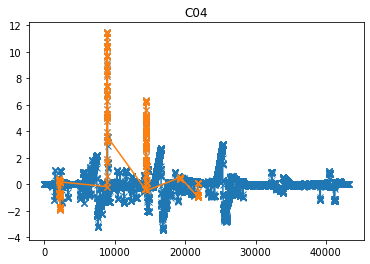

In [228]:
def col_plot(col):
    print(len(make_even(VALIDATION_DATASET[col])))
    print(len((VALIDATION_DATASET[col])))

    plt.plot(VALIDATION_DATASET[col].index, make_even(VALIDATION_DATASET[col]),marker='x')
    plt.plot(VALIDATION_DATASET[col].index[attack_df.index], pd.Series(make_even(VALIDATION_DATASET[col]))[attack_df.index],marker='x')
    plt.title(col)
    #plt.savefig('./plot/columns plot/'+col+'.png')
    plt.show()
    plt.title(col)
    plt.close('all')
    return
    
    
normal_df = VALIDATION_DATASET[VALIDATION_DATASET['attack'] == 0]
attack_df = VALIDATION_DATASET[VALIDATION_DATASET['attack'] == 1]    

for col in VALIDATION_DATASET.columns[4:5]:
    
    col_plot(col)
    

In [179]:
attack_df.index


Int64Index([ 2111,  2112,  2113,  2114,  2115,  2116,  2117,  2118,  2119,
             2120,
            ...
            21880, 21881, 21882, 21883, 21884, 21885, 21886, 21887, 21888,
            21889],
           dtype='int64', length=629)

# 파일 수정

In [31]:
abspath = os.path.abspath("D:/")
os.listdir(abspath)
a = pd.read_csv(abspath+'RESPONSE_DATA.csv')
a['group_key']= a['group_key'].astype(str)
a['group_key'] = a['group_key'].str.replace('.','_')
a.to_csv(abspath+"RESPONSE_DATA.csv")

In [69]:
use_col = ['C47','C02','C07','C49','C01','C26']

In [70]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

VALID = VALIDATION_DATASET[use_col]
minmax_valid = scaler.fit_transform(VALID)

#plt.plot(VALIDATION_DATASET[use_col].mean(axis =1))

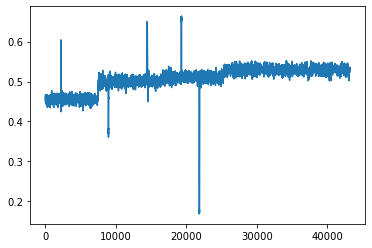

In [120]:
plt.plot(minmax_valid.mean(axis = 1))

In [72]:
TEST = TEST_DATASET[use_col]
minmax_test = scaler.transform(TEST)

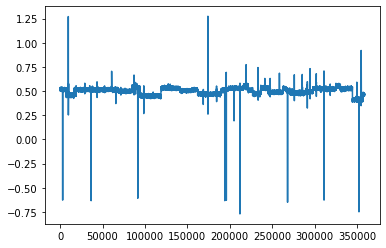

In [73]:
plt.plot(minmax_test.mean(axis = 1))

In [116]:
label_valid = (minmax_valid.mean(axis = 1) > 0.56) | (minmax_valid.mean(axis = 1) < 0.4)

In [117]:
pd.Series(label_valid).value_counts()

False    42897
True       304
dtype: int64

In [227]:
tem = minmax_valid.mean(axis = 1)

def make_even(tem):
    window = 1000
    m =[]
    for i in range(len(tem)):
        if (i > window) and (i < (len(tem)-window)):
            tem_mean = tem[i-window:i+window].mean()
            m.append(tem_mean)
        else:
            m.append(tem[i])
    return m-tem

In [200]:
print(len(tem))
print(len(m))

43201
43201


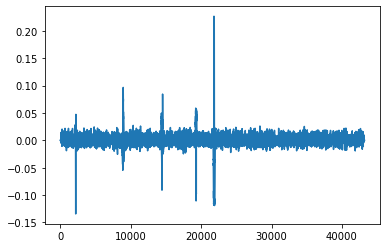

In [201]:
ans = m- tem
plt.plot(ans)

In [207]:
label_valid = (ans  > 0.03) | (ans < -0.05)
list(label_valid).index(True)

2189

In [208]:
predict = pd.Series(label_valid)[pd.Series(label_valid) == True].index

In [209]:

real = attack_df.index

In [210]:
predict

Int64Index([ 2189,  2190,  2191,  2192,  2193,  2194,  2195,  2196,  2197,
             2198,
            ...
            21948, 21949, 21950, 21951, 21952, 21953, 21954, 21955, 21956,
            21959],
           dtype='int64', length=652)

In [206]:
real

Int64Index([ 2111,  2112,  2113,  2114,  2115,  2116,  2117,  2118,  2119,
             2120,
            ...
            21880, 21881, 21882, 21883, 21884, 21885, 21886, 21887, 21888,
            21889],
           dtype='int64', length=629)